<a href="https://colab.research.google.com/github/dansarmiento/analytics_portfolio/blob/main/EDA_Workflow_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Workflow in Python

This notebook evaluates approaches to exploring data with statistical and visual analytical tools in the jupyter notebook environment.

This notebook walks through the essential steps of exploring data in Python to find patterns and insights. We start by taking a first look at the data, checking for missing pieces or errors, and getting it ready for analysis by cleaning it up. Then, we dig deeper by looking at each part of the data on its own, seeing how different parts relate to each other, and even exploring more complex connections. The notebook also shows how to analyze data that changes over time. Finally, we learn how to form questions about the data and use visualizations to see if our initial ideas hold up, making the exploration process interactive and easy to understand.

In [54]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for prettier plots
sns.set_theme(style="whitegrid")

# Load a sample dataset (e.g., the 'tips' dataset)
tips = sns.load_dataset('tips')

# Data Collection & Initial Inspection

In [55]:
# First Glance - taking a look at the first few rows
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [56]:
# Look at the shape of the dataframe, the rows and columns
tips.shape

(244, 7)

In [57]:
# Look at the data types and the count of non-null values
tips.info() # This prints directly, no need for print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# Data Cleaning and Preparation

In [58]:
# Create a copy for cleaning to keep the original intact
df_cleaned = tips.copy()

The tips dataset is quite clean as it is a frequently used sample dataset, so we will look at another example dataset for the purpose of evaluating handling nulls.

In [59]:
# Handling Missing Values
print("\nMissing values before handling:")
print(df_cleaned.isnull().sum())

# Load titanic dataset to show more realistic missing value handling
titanic = sns.load_dataset('titanic')
print("\nMissing values in Titanic dataset:")
print(titanic.isnull().sum())


Missing values before handling:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Missing values in Titanic dataset:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [60]:
# Imputation on age column in titanic - filling in the nulls especially for the purpose of machine learning models
# For numerical: fill with mean or median so that the value distribution stays the same
median_age = titanic['age'].median()
titanic['age'] = titanic['age'].fillna(median_age)
print("\nTitanic age nulls after median imputation:")
print(titanic['age'].isnull().sum())


Titanic 'age' after median imputation:
0


In [61]:
# For categorical: fill with mode (e.g., 'embarked' in titanic)
mode_embarked = titanic['embarked'].mode()[0] # mode() can return multiple if ties
titanic['embarked'] = titanic['embarked'].fillna(mode_embarked)
print("\nTitanic embarked nulls after mode imputation:")
print(titanic['embarked'].isnull().sum())


Titanic 'embarked' after mode imputation:
0


In [62]:
# 'deck' has many missing values, might be better to drop or create 'has_deck'
titanic.drop('deck', axis=1, inplace=True) # Example of dropping a column
print("\nTitanic dataset after dropping 'deck':")
print(titanic.isnull().sum())



Titanic dataset after dropping 'deck':
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


Outliers are data points that are significantly different from most of the other data points in your dataset. When you're doing Exploratory Data Analysis (EDA), which is about understanding the main characteristics and patterns in your data, outliers can cause problems:

- They Distort Summary Statistics: Simple measures like the average (mean) are very sensitive to outliers. If you have a few extremely high or low values, they can pull the average dramatically in that direction, making it less representative of the typical data.

- They Can Make Visualizations Misleading: Plots like histograms or box plots can look very different if outliers are present. The scale of the plot might be stretched to include the extreme values, making the patterns in the rest of the data harder to see and interpret clearly.

- They Can Hide True Relationships: When you look for connections between different variables (like plotting one against another), outliers can obscure or falsely suggest relationships that don't exist for the majority of your data.

- Essentially, outliers can give you a skewed or inaccurate view of your data during EDA, making it harder to find the real story the data is telling.


Handling Outliers (on 'total_bill' in tips dataset):


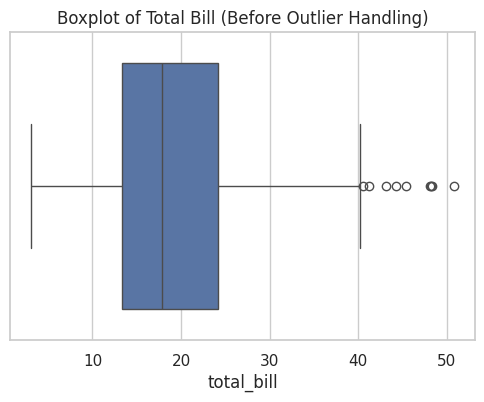

In [63]:
# Handling Outliers (using 'tips' dataset for this part)
# The purpose of cleaning up the outliers is to avoid their undue influence on statistical evaluation
print("\nHandling Outliers (on 'total_bill' in tips dataset):")
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned['total_bill'])
plt.title('Boxplot of Total Bill (Before Outlier Handling)')
plt.show()

In [64]:
# IQR method for outlier treatment (example: capping)
Q1 = df_cleaned['total_bill'].quantile(0.25)
Q3 = df_cleaned['total_bill'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [65]:
df_cleaned['total_bill_capped'] = np.where(df_cleaned['total_bill'] > upper_bound, upper_bound,
                                     np.where(df_cleaned['total_bill'] < lower_bound, lower_bound,
                                              df_cleaned['total_bill']))

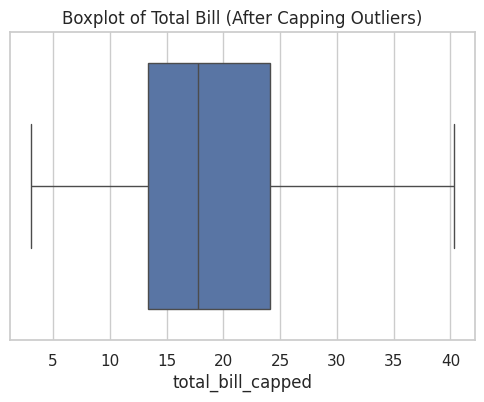

In [66]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned['total_bill_capped'])
plt.title('Boxplot of Total Bill (After Capping Outliers)')
plt.show()

In [67]:
print(f"Original min: {tips['total_bill'].min()}, Original max: {tips['total_bill'].max()}")
print(f"Capped min: {df_cleaned['total_bill_capped'].min()}, Capped max: {df_cleaned['total_bill_capped'].max()}")

Original min: 3.07, Original max: 50.81
Capped min: 3.07, Capped max: 40.29749999999999


In [68]:
# Data Type Conversion (Example, though 'tips' is mostly correct)
# If 'size' was an object and we wanted it as int:
# df_cleaned['size_numeric'] = df_cleaned['size'].astype(int)
print("\nData types after potential conversions (no actual change for 'tips'):")
print(df_cleaned.dtypes)


Data types after potential conversions (no actual change for 'tips'):
total_bill            float64
tip                   float64
sex                  category
smoker               category
day                  category
time                 category
size                    int64
total_bill_capped     float64
dtype: object


In [69]:
# Removing Duplicates
# Introduce a duplicate row for demonstration
df_with_duplicates = pd.concat([df_cleaned, df_cleaned.head(1)], ignore_index=True)
print(f"\nShape before removing duplicates: {df_with_duplicates.shape}")
df_no_duplicates = df_with_duplicates.drop_duplicates()
print(f"Shape after removing duplicates: {df_no_duplicates.shape}")


Shape before removing duplicates: (245, 8)
Shape after removing duplicates: (243, 8)


In [70]:
# Feature Engineering (Basic)
print("\nBasic Feature Engineering:")
# Example 1: Calculate tip percentage
df_no_duplicates['tip_percentage'] = (df_no_duplicates['tip'] / df_no_duplicates['total_bill']) * 100


Basic Feature Engineering:


<ipython-input-70-56b6ccabae58>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
# Example 2: Bin 'total_bill' into categories
bins = [0, 10, 20, 30, 40, 50, np.inf]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50+']
df_no_duplicates['bill_group'] = pd.cut(df_no_duplicates['total_bill'], bins=bins, labels=labels, right=False)

<ipython-input-71-e90827e46e3e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
print("\nDataFrame with new features ('tip_percentage', 'bill_group'):")
print(df_no_duplicates[['total_bill', 'tip', 'tip_percentage', 'bill_group']].head())


DataFrame with new features ('tip_percentage', 'bill_group'):
   total_bill   tip  tip_percentage bill_group
0       16.99  1.01        5.944673      10-20
1       10.34  1.66       16.054159      10-20
2       21.01  3.50       16.658734      20-30
3       23.68  3.31       13.978041      20-30
4       24.59  3.61       14.680765      20-30


# Univariate Analysis

In [73]:
# Numerical Variables
# Using the 'df_no_duplicates' which is the cleaned 'tips' dataset
print("\nDescriptive Statistics for Numerical Variables such as total bill")
df_no_duplicates['total_bill'].describe()


Descriptive Statistics for Numerical Variables such as total bill


,total_bill
count,243.000000
mean,19.813868
std,8.910071
min,3.070000
25%,13.380000
50%,17.810000
75%,24.175000
max,50.810000


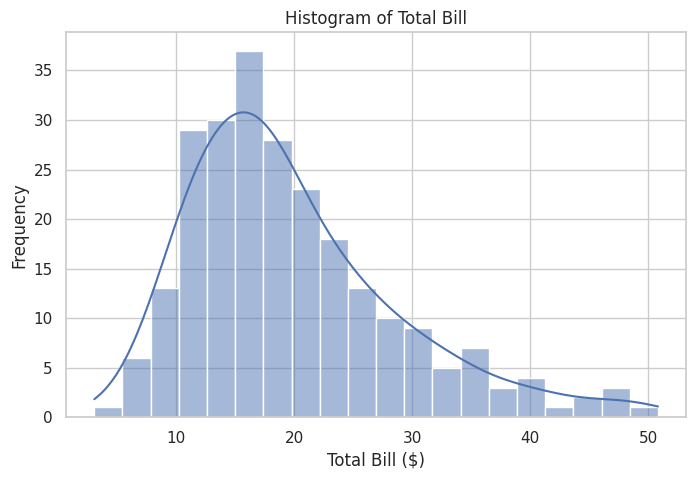

In [74]:
# Histograms
plt.figure(figsize=(8, 5))
sns.histplot(df_no_duplicates['total_bill'], kde=True, bins=20)
plt.title('Histogram of Total Bill')
plt.xlabel('Total Bill ($)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-75-63625c7e1979>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




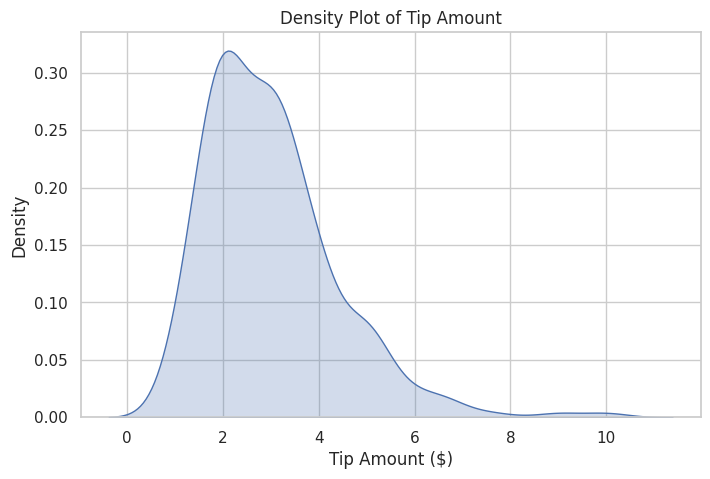

In [75]:
# Density Plots (KDE) - often shown with histplot via kde=True
plt.figure(figsize=(8, 5))
sns.kdeplot(df_no_duplicates['tip'], fill=True)
plt.title('Density Plot of Tip Amount')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Density')
plt.show()

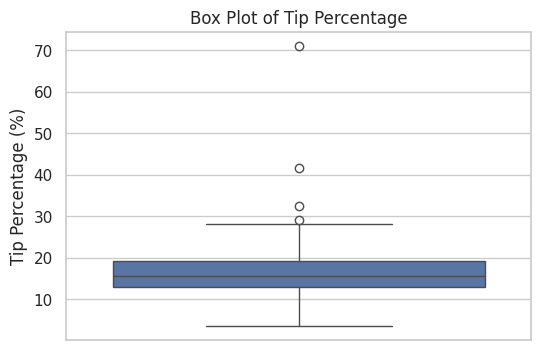

In [76]:
# Box Plots
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_no_duplicates['tip_percentage'])
plt.title('Box Plot of Tip Percentage')
plt.ylabel('Tip Percentage (%)')
plt.show()

# Violin plot
Inside the violin, there's a thin box plot showing:

The middle (median),

The range (how spread out the data is),

And possible outliers.

- The most common party size is around 2 people (because it's widest there).

- Larger party sizes (like 5 or 6) happen less often (the violin is thinner there).

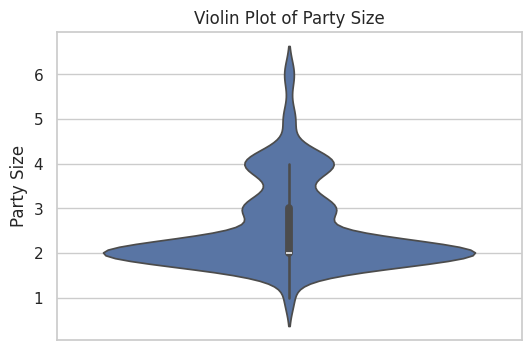

In [77]:
# Violin Plots
plt.figure(figsize=(6, 4))
sns.violinplot(y=df_no_duplicates['size'])
plt.title('Violin Plot of Party Size')
plt.ylabel('Party Size')
plt.show()

# Skewness and Kurtosis
- skewness interpretation - mostbill values are clustered toward the lower end, but there are a few larger bills pulling the average up

- kurkosis interpretation  - there's a moderate presence of extreme total bills—some very high tips that are not typical but occur more than expected under a normal distribution

In [78]:
# Measures of Shape (Skewness and Kurtosis)
print(f"\nSkewness of 'total_bill': {df_no_duplicates['total_bill'].skew()}")
print(f"Kurtosis of 'total_bill': {df_no_duplicates['total_bill'].kurtosis()}")


Skewness of 'total_bill': 1.1273625781584489
Kurtosis of 'total_bill': 1.20581980781144


In [79]:
# Categorical Variables
print("\nValue Counts for Categorical Variables (e.g., 'day'):")
print(df_no_duplicates['day'].value_counts())


Descriptive Statistics for Categorical Variables (e.g., 'day'):
day
Sat     87
Sun     76
Thur    61
Fri     19
Name: count, dtype: int64


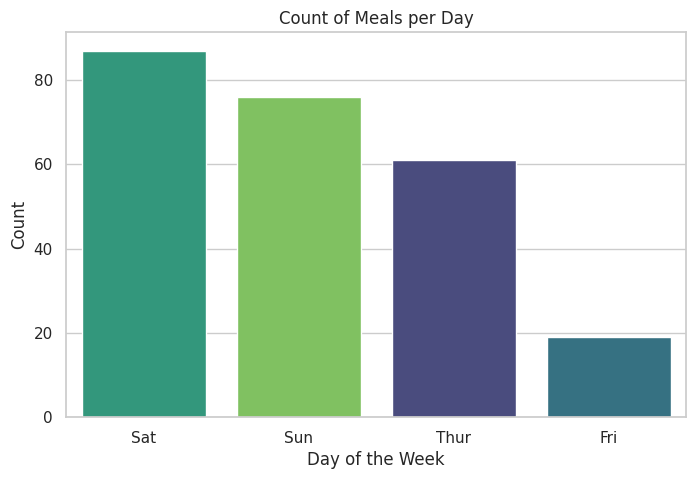

In [80]:
# Bar Charts/Count Plots
plt.figure(figsize=(8, 5))
sns.countplot(x='day', data=df_no_duplicates, palette='viridis', hue='day', order=df_no_duplicates['day'].value_counts().index)
plt.title('Count of Meals per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis

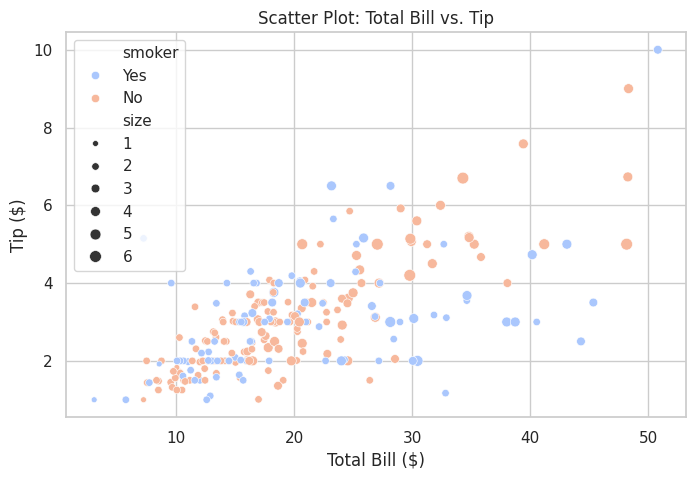

In [81]:
# Numerical vs. Numerical
# Scatter Plots
plt.figure(figsize=(8, 5))
sns.scatterplot(x='total_bill', y='tip', data=df_no_duplicates, hue='smoker', size='size', palette='coolwarm')
plt.title('Scatter Plot: Total Bill vs. Tip')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.show()

In [82]:
# Correlation Matrix
numerical_cols = df_no_duplicates.select_dtypes(include=np.number).columns
correlation_matrix = df_no_duplicates[numerical_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                   total_bill       tip      size  total_bill_capped  \
total_bill           1.000000  0.674998  0.597589           0.992560   
tip                  0.674998  1.000000  0.488400           0.656987   
size                 0.597589  0.488400  1.000000           0.603616   
total_bill_capped    0.992560  0.656987  0.603616           1.000000   
tip_percentage      -0.339400  0.342408 -0.143252          -0.353192   

                   tip_percentage  
total_bill              -0.339400  
tip                      0.342408  
size                    -0.143252  
total_bill_capped       -0.353192  
tip_percentage           1.000000  


### Correlation Matrix Interpretation

| Variable Pair                | Correlation | Strength        | Interpretation                                                                 |
|-----------------------------|-------------|------------------|--------------------------------------------------------------------------------|
| `total_bill` ↔ `tip`        | 0.675       | Strong Positive  | Bigger bills tend to lead to bigger tips.                                      |
| `total_bill` ↔ `size`       | 0.598       | Moderate Positive| Larger parties usually spend more.                                             |
| `total_bill` ↔ `tip_percentage` | -0.339  | Moderate Negative| Higher bills are often tipped at a lower percentage.                           |
| `size` ↔ `tip_percentage`   | -0.143      | Weak Negative    | Larger parties might tip a slightly smaller percentage.                        |
| `tip` ↔ `tip_percentage`    | 0.342       | Moderate Positive| Tip amount and tip percentage are related, but not strongly.                   |
| `total_bill` ↔ `total_bill_capped` | 0.993 | Very Strong Positive | Indicates `total_bill_capped` is a clipped or adjusted version of `total_bill`. |



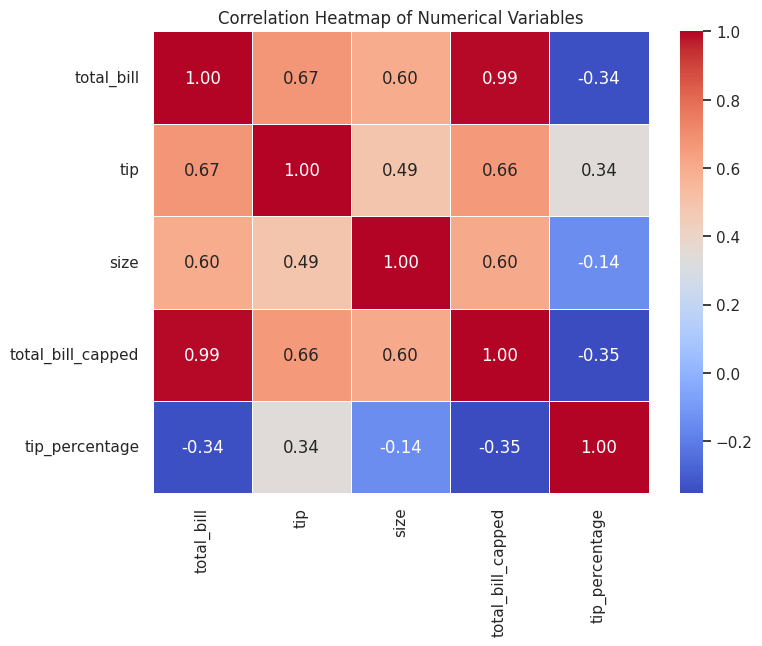

In [83]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

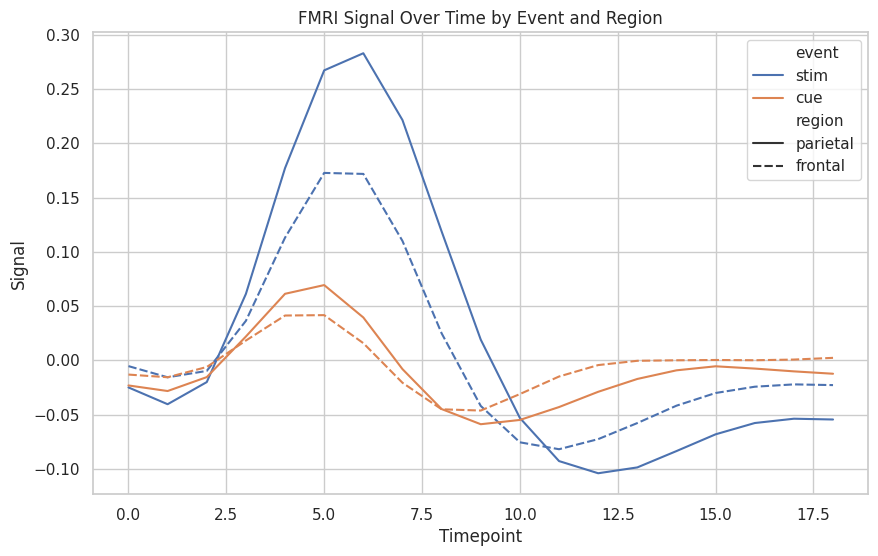

In [84]:
# Line Plots (Example using 'fmri' dataset which has a time component)
fmri = sns.load_dataset('fmri')
plt.figure(figsize=(10, 6))
sns.lineplot(x='timepoint', y='signal', hue='event', style='region', data=fmri, errorbar=None) # errorbar='sd' or ci=None
plt.title('FMRI Signal Over Time by Event and Region')
plt.xlabel('Timepoint')
plt.ylabel('Signal')
plt.show()

### Key Interpretations of the fMRI Line Plot

| Feature                   | Insight                                                                 |
|---------------------------|-------------------------------------------------------------------------|
| **Peak Around Timepoint 5–6** | The **`stim` event** causes a **sharp rise** in signal strength in both `parietal` and `frontal` regions. The parietal region shows the **strongest response**. |
| **`cue` Event Response is Weaker** | The `cue` event shows **much lower signal strength overall**, suggesting a **weaker neural response** compared to `stim`. |
| **Parietal vs. Frontal**  | The **parietal region** (solid lines) consistently has **higher signal amplitudes** than the **frontal region** (dashed lines), especially during the `stim` event. |
| **Post-Peak Decline**     | After peaking at timepoint ~6, signals drop off rapidly, indicating a **quick return to baseline**. |


In [85]:
# Categorical vs. Categorical
print("\nCategorical vs. Categorical:")
# Contingency Tables (Cross-tabulations)
contingency_table = pd.crosstab(df_no_duplicates['day'], df_no_duplicates['time'])
print("\nContingency Table (Day vs. Time):")
print(contingency_table)


Categorical vs. Categorical:

Contingency Table (Day vs. Time):
time  Lunch  Dinner
day                
Thur     60       1
Fri       7      12
Sat       0      87
Sun       0      76


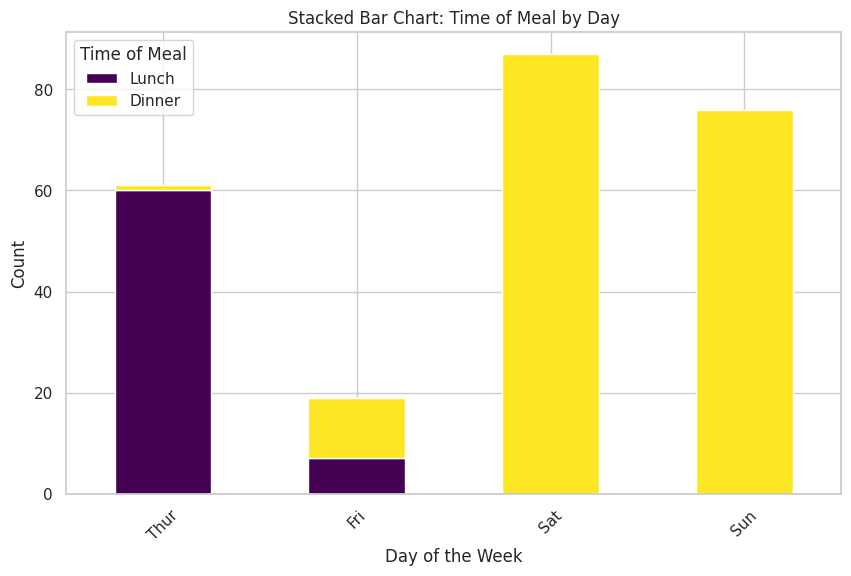

In [86]:
# Stacked Bar Charts or Grouped Bar Charts
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Stacked Bar Chart: Time of Meal by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Time of Meal')
plt.show()

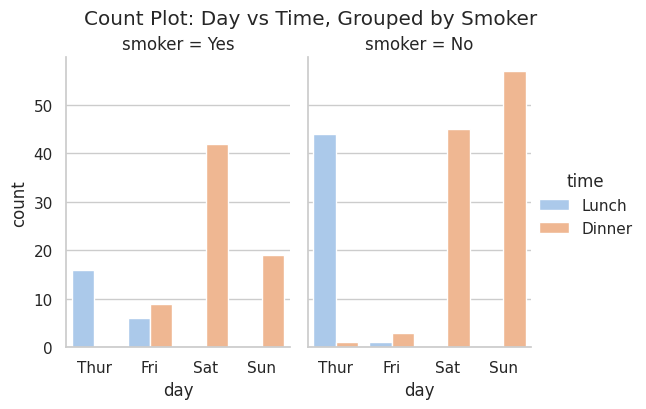

In [107]:
sns.catplot(x="day", hue="time", col="smoker", data=df_no_duplicates, kind="count", height=4, aspect=.7, palette='pastel');
plt.suptitle('Count Plot: Day vs Time, Grouped by Smoker', y=1.02)
plt.show()

In [108]:
contingency_table.head()

time,Lunch,Dinner
day,,
Thur,60,1
Fri,7,12
Sat,0,87
Sun,0,76


In [88]:
#  Chi-Squared Test - testing whether there's a statistically significant relationship betweeen two variables
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared test for Day vs Time: p-value = {p}")


Chi-squared test for Day vs Time: p-value = 1.5177922160193002e-46



Numerical vs. Categorical:


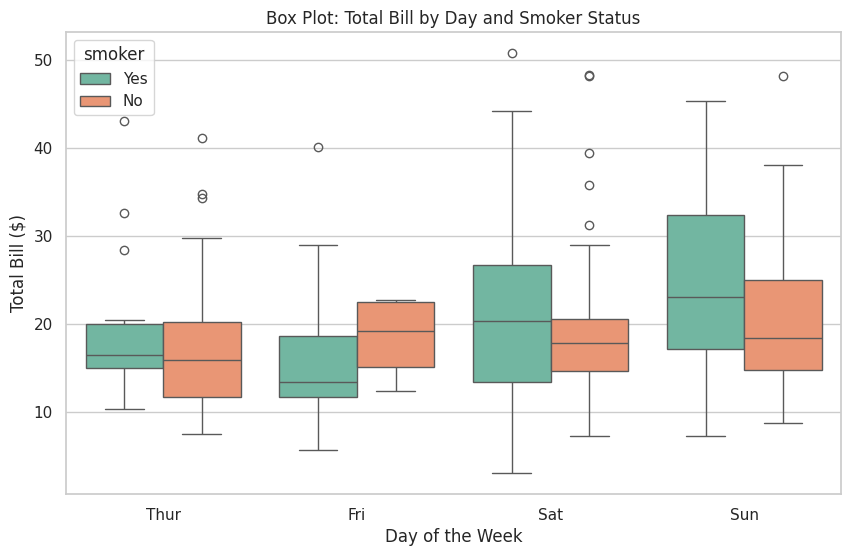

In [89]:
# Numerical vs. Categorical
print("\nNumerical vs. Categorical:")
# Grouped Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='total_bill', hue='smoker', data=df_no_duplicates, palette='Set2')
plt.title('Box Plot: Total Bill by Day and Smoker Status')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bill ($)')
plt.show()

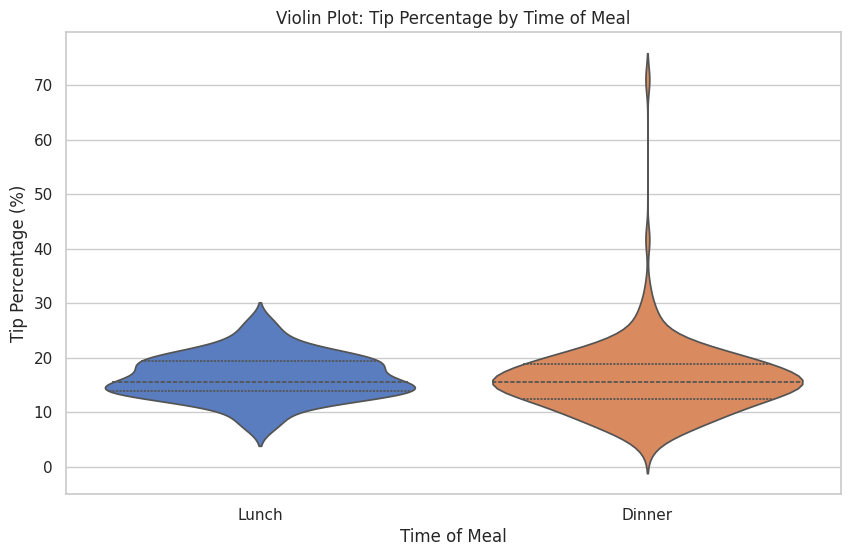

In [90]:
# Violin Plots
plt.figure(figsize=(10, 6))
sns.violinplot(x='time', y='tip_percentage', data=df_no_duplicates, inner='quartile', palette='muted', hue='time')
plt.title('Violin Plot: Tip Percentage by Time of Meal')
plt.xlabel('Time of Meal')
plt.ylabel('Tip Percentage (%)')
plt.show()

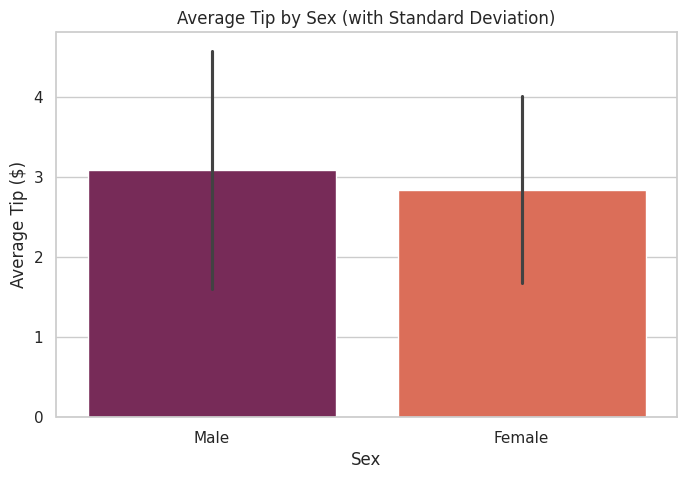

In [91]:
# Bar Charts of Aggregates
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='tip', data=df_no_duplicates, estimator=np.mean, errorbar='sd', palette='rocket', hue='sex') # ci='sd' in older seaborn
plt.title('Average Tip by Sex (with Standard Deviation)')
plt.xlabel('Sex')
plt.ylabel('Average Tip ($)')
plt.show()

In [92]:
# ANOVA / T-tests to test if mean total_bill differs by day:
from scipy.stats import f_oneway
groups = [df_no_duplicates['total_bill'][df_no_duplicates['day'] == day] for day in df_no_duplicates['day'].unique()]
f_stat, p_value = f_oneway(*groups)
print(f"\nANOVA for total_bill by day: p-value = {p_value}")


ANOVA for total_bill by day: p-value = 0.049079098725077826


# Multivariate Analysis

In [93]:
# Using 'iris' dataset for some multivariate examples as it has clear groups
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


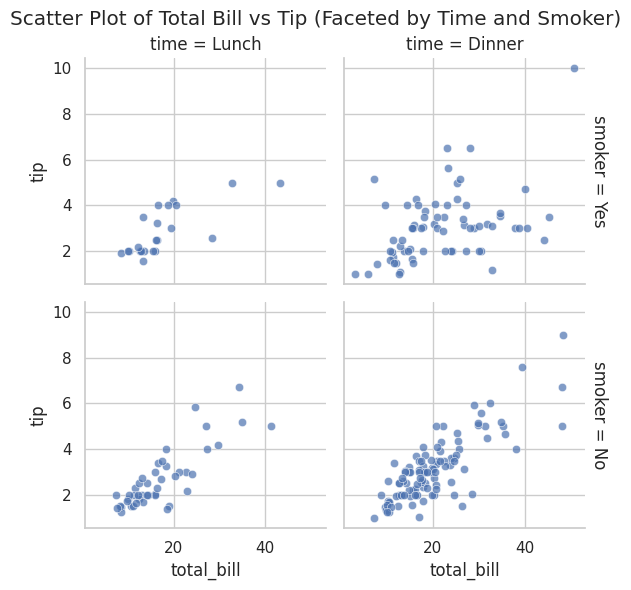

In [94]:
# Grouped Visualizations (already shown in scatter plot with hue and size)
# Another example: FacetGrid
g = sns.FacetGrid(tips, col="time", row="smoker", margin_titles=True)
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plot of Total Bill vs Tip (Faceted by Time and Smoker)')
plt.show()

**Rationale for Dimensionality Reduction**

Imagine you have a spreadsheet with lots and lots of columns (these are your "dimensions" or "features").

The main reasons you'd want to reduce these dimensions are:

- Easier Visualization: It's impossible for us humans to visualize data in more than 3 dimensions. If you have 10 features, you can't just "look" at it. Dimensionality reduction techniques (like PCA or t-SNE) can squash these many features down to 2 or 3, which you can plot and see if there are any patterns, clusters, or relationships. This is exactly what your code aims to do for the Iris dataset – take 4 features and reduce them to 2 (PC1, PC2) so you can make a 2D scatter plot.
- Less Noise, More Signal: Some features might be redundant (e.g., temperature in Celsius and Fahrenheit – they tell you the same thing) or irrelevant (noise). Dimensionality reduction can help combine related features and discard less important ones, making the underlying patterns clearer.
- Faster Computations: Fewer dimensions mean less data to process, which can make subsequent calculations or machine learning model training much faster.
- Avoiding the "Curse of Dimensionality": When you have too many features compared to your number of data points, machine learning models can perform poorly because the data becomes very "sparse" – it's like trying to find a needle in an increasingly vast haystack. Reducing dimensions can help combat this.

In [95]:
# Dimensionality Reduction Techniques for Visualization
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = iris.loc[:, features].values
y = iris.loc[:,['species']].values
x_scaled = StandardScaler().fit_transform(x)

# PCA Example
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, iris[['species']]], axis = 1)

**What is PCA (Principal Component Analysis)?**

PCA is one of the most common techniques for dimensionality reduction. Here's the gist of how it works:

- Find the Direction of Most Variance: PCA looks for the direction in your multi-dimensional data where the data points are most spread out (this direction has the highest "variance"). This direction becomes your first Principal Component (PC1). Think of it as drawing the best possible straight line that captures the most information about how your data is distributed.
- Find the Next Best Direction: Then, PCA looks for the next direction that captures the most remaining variance, with the condition that this new direction must be "orthogonal" (at a right angle) to the first one. This is your PC2.
- Repeat (if needed): It continues this process, finding subsequent principal components, each orthogonal to the previous ones and capturing progressively less variance.
- Keep the Important Ones: You then decide to keep only the first few principal components. These components are new, artificial features that are combinations of your original features. They are ordered by how much variance (information) they capture from the original data. By keeping only PC1 and PC2, you're essentially saying that these two new combined features capture the most important patterns in my original 4 features.

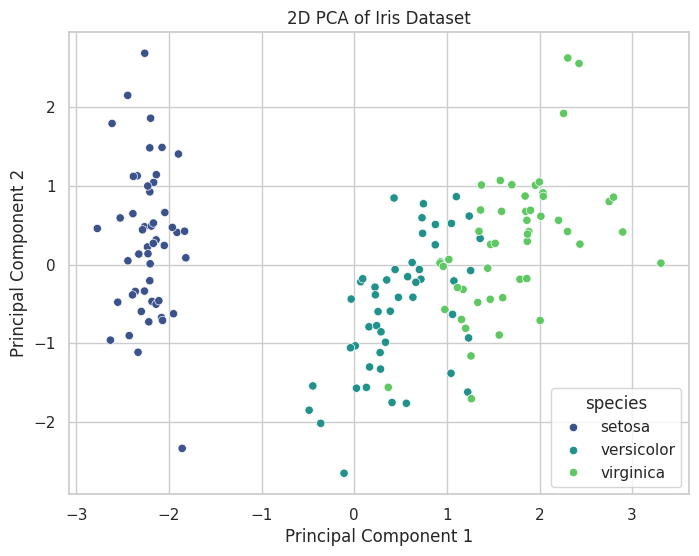

Explained variance by PC1: 0.73
Explained variance by PC2: 0.23


In [96]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=finalDf, palette='viridis')
plt.title('2D PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
print(f"Explained variance by PC1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Explained variance by PC2: {pca.explained_variance_ratio_[1]:.2f}")

**What is t-SNE (t-distributed Stochastic Neighbor Embedding)?**

Imagine you have a complex, high-dimensional dataset (like your Iris data with 4 features). You want to see if there are any natural groupings or clusters of data points, but you can't "look" at it in 4D.

t-SNE is a technique specifically designed to take that high-dimensional data and create a low-dimensional "map" (usually 2D or 3D) where similar data points from the original space end up close together on the map, and dissimilar points end up far apart. It's particularly good at revealing the underlying structure, like clusters.

Think of it like trying to arrange a crowd of people in a field based on their relationships:

Understanding Relationships in High Dimensions:

First, t-SNE looks at your original high-dimensional data. For every pair of data points, it calculates how "similar" or "close" they are. It thinks of this in terms of probabilities: "If I pick a neighbor for point A, what's the chance it's point B?" If A and B are very similar (close in the original 4D space), this probability will be high.

Creating an Initial Low-Dimensional Map:

Next, t-SNE takes all your data points and scatters them randomly onto a 2D map.
Adjusting the Map to Reflect True Similarities:

Now, the clever part: t-SNE tries to adjust the positions of the points on this 2D map. Its goal is to make the distances on the map reflect the similarities it found in the original high-dimensional space.

It calculates similarity probabilities for the points on the 2D map as well, but it uses a special type of probability (based on the "t-distribution," hence the "t" in t-SNE) which is good at keeping dissimilar points further apart in the map.
It then iteratively moves the points around on the 2D map, trying to make the set of "map similarities" match the set of "original high-D similarities" as closely as possible. If two points were very similar in 4D, t-SNE tries to pull them close together on the 2D map. If they were very different, it pushes them apart.
Key things to understand about t-SNE:

Focus on Local Structure: It's excellent at showing you local relationships and clusters. It's less concerned with preserving global distances accurately (unlike PCA which focuses on global variance). This means the relative sizes of clusters and distances between clusters in a t-SNE plot might not always be perfectly representative of their separation in the original space, but the clusters themselves are usually well-defined.
Non-linear: It can capture complex, non-linear structures in your data.

Visualization, Not Necessarily Preprocessing: While it reduces dimensions, its primary use is for visualization and exploration, not typically as a preprocessing step for other machine learning algorithms in the same way PCA might be used (because the new axes are not as interpretable).


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



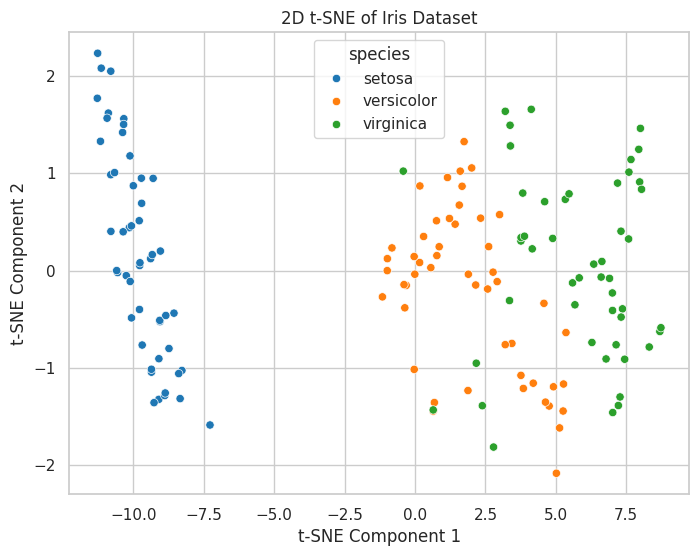

In [97]:
# t-SNE Example
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300, random_state=42) # verbose=1 for progress
tsne_results = tsne.fit_transform(x_scaled)
tsneDf = pd.DataFrame(data = tsne_results, columns = ['TSNE1', 'TSNE2'])
finalTsneDf = pd.concat([tsneDf, iris[['species']]], axis = 1)

plt.figure(figsize=(8,6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='species', data=finalTsneDf, palette='tab10')
plt.title('2D t-SNE of Iris Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Time Series Analysis

In [98]:
print("\nFMRI dataset head (for time series context):")
fmri.head()


FMRI dataset head (for time series context):


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


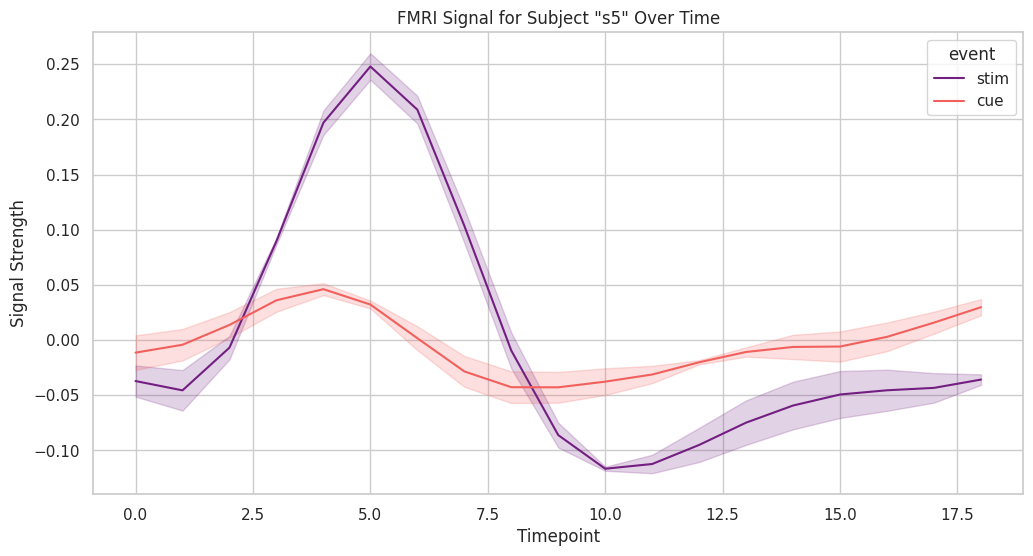

In [99]:
# Line Plots over Time
plt.figure(figsize=(12, 6))
subject_data = fmri[fmri['subject'] == 's5'] # Example for a single subject
sns.lineplot(x='timepoint', y='signal', hue='event', data=subject_data, palette='magma')
plt.title('FMRI Signal for Subject "s5" Over Time')
plt.xlabel('Timepoint')
plt.ylabel('Signal Strength')
plt.show()

- For time series decomposition, you need to set the 'period' parameter.
- This value depends on the frequency of your time series data.
- In the absence of specific domain knowledge about the fmri dataset's signal frequency,
you would typically determine this from the data or its source.
- For demonstration, let's use a placeholder value. You should replace '?' with the correct period.
- For instance, if the signal repeats every 10 timepoints, you'd use period=10.

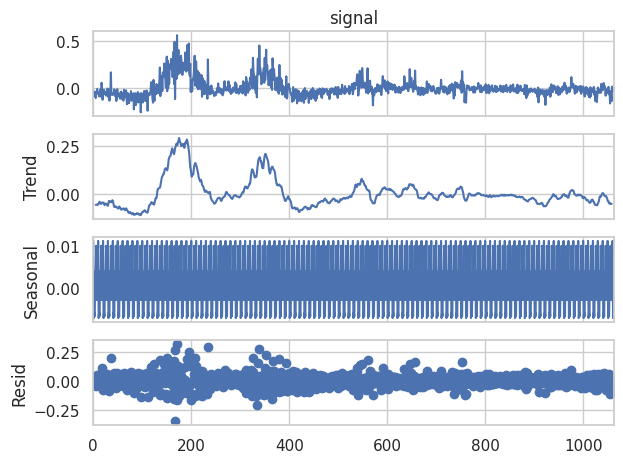

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decomposition
period_value = 10  # Replace with the actual period
result = seasonal_decompose(fmri['signal'].dropna(), model='additive', period=period_value)
result.plot()
plt.show()

### Seasonal Decomposition Summary

| Component   | Meaning                | Insight                                                   |
|-------------|------------------------|------------------------------------------------------------|
| **Signal**  | Original time series   | Raw fMRI activity over time                                |
| **Trend**   | Long-term movement     | Slow rise and fall in baseline brain signal                |
| **Seasonal**| Repeating cycles       | Strong periodic pattern, likely related to experimental timing |
| **Residual**| Random noise           | Mostly small; a few outliers may indicate anomalies         |


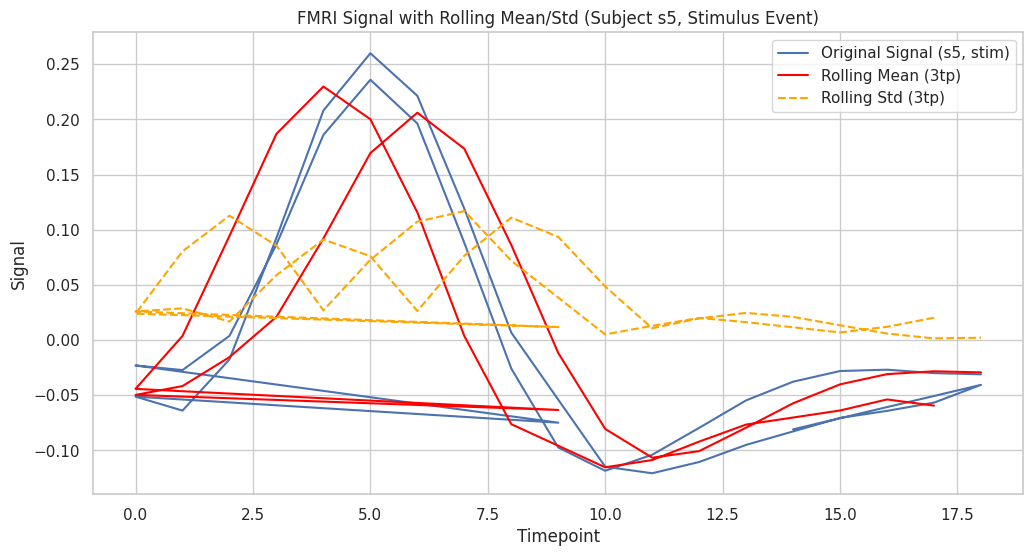

In [101]:
# Rolling Statistics
plt.figure(figsize=(12, 6))
subject_event_data = fmri[(fmri['subject'] == 's5') & (fmri['event'] == 'stim')]
subject_event_data = subject_event_data.set_index('timepoint')['signal'] # Need a proper time index for rolling

rolling_mean = subject_event_data.rolling(window=3).mean() # 3-timepoint rolling mean
rolling_std = subject_event_data.rolling(window=3).std()

plt.plot(subject_event_data.index, subject_event_data, label='Original Signal (s5, stim)')
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean (3tp)', color='red')
plt.plot(rolling_std.index, rolling_std, label='Rolling Std (3tp)', color='orange', linestyle='--')
plt.title('FMRI Signal with Rolling Mean/Std (Subject s5, Stimulus Event)')
plt.xlabel('Timepoint')
plt.ylabel('Signal')
plt.legend()
plt.show()

# ACF (Autocorrelation Function)
The ACF tells you how correlated a time series is with its lagged versions.

An ACF plot shows how much a time series is related to its past values.

Lag 1 = Compare today to yesterday

Lag 2 = Compare today to two days ago

And so on…

The plot shows:

Y-axis: Strength of the relationship (from -1 to 1)

X-axis: How far back you're looking (lags)

Lag 0 is always 1 — it’s the series compared to itself.


### 🔍 How to Read an ACF Plot

| What to Look For               | What It Means                                |
|-------------------------------|-----------------------------------------------|
|  **Tall spikes**             | Strong correlation with past values           |
|  **Fast drop-off**           | Past values lose influence quickly            |
|  **Slow drop-off**           | Long-term memory or persistence in the data   |
|  **Repeating spikes**        | Suggests seasonality or cyclic behavior       |
|  **Spikes outside blue band**| Statistically significant — not just noise    |


# PACF (Partial Autocorrelation Function)

PACF helps you pinpoint which past values matter the most — and filters out the noise from the ones that don’t

### Key Takeaways from a PACF Plot

| What to Look For                     | What It Means                                                  |
|--------------------------------------|-----------------------------------------------------------------|
|  **Spikes at specific lags**       | These past values have a **direct impact** on the current value |
|  **Sharp cut-off after lag `p`**   | Suggests an **AR(p)** model might be appropriate for ARIMA      |
|  **Spikes outside the blue band**  | Indicates those lags are **statistically significant**          |



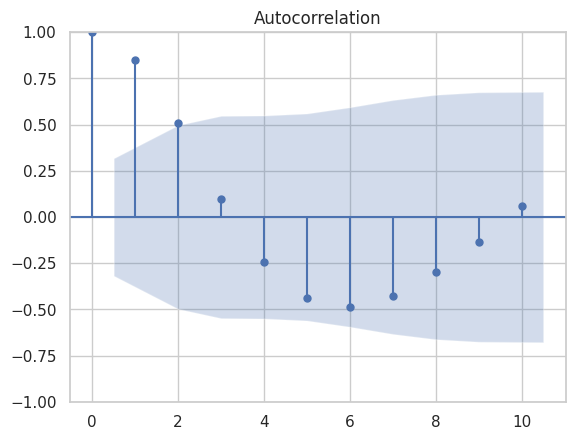

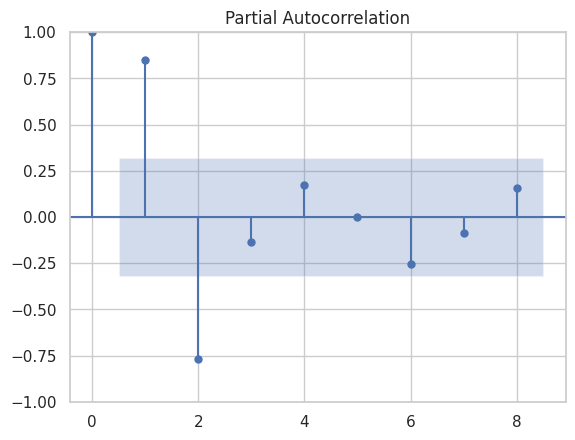

In [102]:
# ACF and PACF Plots (Conceptual - typically uses statsmodels)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(subject_event_data.dropna(), lags=10)
plt.show()
plot_pacf(subject_event_data.dropna(), lags=8) # Lags should be less than N/2
plt.show()

# Hypothesis Generation and Preliminary Testing
Example hypothesis - tips are higher on weekends vs weekdays

<ipython-input-103-dc752be6849d>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




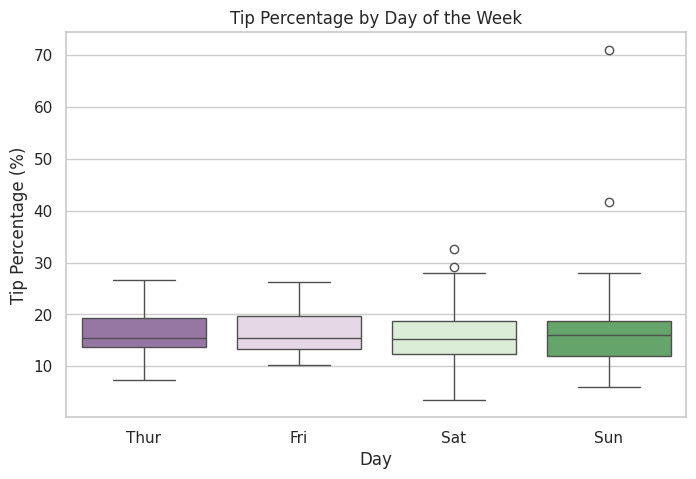

Visual inspection suggests tips might be slightly higher or more varied on weekends.


In [103]:
# Visual check:
plt.figure(figsize=(8, 5))
sns.boxplot(x='day', y='tip_percentage', data=df_no_duplicates, order=['Thur', 'Fri', 'Sat', 'Sun'], palette='PRGn')
plt.title('Tip Percentage by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Tip Percentage (%)')
plt.show()
print("Visual inspection suggests tips might be slightly higher or more varied on weekends.")

In [104]:
# Preliminary Test with a simplified view, compare average tip percentage:
weekend_days = ['Sat', 'Sun']
weekday_days = ['Thur', 'Fri']

In [105]:
avg_tip_weekend = df_no_duplicates[df_no_duplicates['day'].isin(weekend_days)]['tip_percentage'].mean()
avg_tip_weekday = df_no_duplicates[df_no_duplicates['day'].isin(weekday_days)]['tip_percentage'].mean()

print(f"Average tip percentage on weekends: {avg_tip_weekend:.2f}%")
print(f"Average tip percentage on weekdays: {avg_tip_weekday:.2f}%")
print("A formal statistical test (e.g., t-test) would be needed for significance.")

Average tip percentage on weekends: 15.96%
Average tip percentage on weekdays: 16.34%
A formal statistical test (e.g., t-test) would be needed for significance.


# Interactive Visualization

In [106]:
import plotly.express as px
fig = px.scatter(df_no_duplicates, x="total_bill", y="tip", color="day", size="size",
                 hover_data=['smoker', 'time', 'tip_percentage'],
                 title="Interactive Scatter Plot: Total Bill vs. Tip")
fig.show()